In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import tensorflow as tf

from sklearn.metrics import accuracy_score, precision_score, recall_score
from sklearn.model_selection import train_test_split
from tensorflow.keras import layers, losses
from tensorflow.keras.datasets import fashion_mnist
from tensorflow.keras.models import Model

In [2]:
(x_train, _), (x_test, _) = fashion_mnist.load_data()

x_train = x_train.astype('float32') / 255.
x_test = x_test.astype('float32') / 255.

print (x_train.shape)
print (x_test.shape)

4422102/4422102 [==============================] - 2s 1us/step
(60000, 28, 28)
(10000, 28, 28)


In [34]:
class Autoencoder(Model):
  def __init__(self, latent_dim, shape):
    super(Autoencoder, self).__init__()
    self.latent_dim = latent_dim
    self.shape = shape
    self.encoder = tf.keras.Sequential([
      layers.Flatten(),
      layers.Dense(latent_dim, activation='relu'),
    ])
    self.decoder = tf.keras.Sequential([
      layers.Dense(tf.math.reduce_prod(shape).numpy(), activation='sigmoid'),
      layers.Reshape(shape)
    ])

  def call(self, x):
    encoded = self.encoder(x)
    decoded = self.decoder(encoded)
    return decoded


shape = x_test.shape[1:]
latent_dim = 64
autoencoder = Autoencoder(latent_dim, shape)

In [37]:
autoencoder.compile(optimizer='adam', loss=losses.MeanSquaredError())

In [39]:
autoencoder.fit(x_train, x_train,
                epochs=10,
                shuffle=True,
                validation_data=(x_test, x_test))

Epoch 1/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0239 - val_loss: 0.0132
Epoch 2/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0116 - val_loss: 0.0106
Epoch 3/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0101 - val_loss: 0.0097
Epoch 4/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0095 - val_loss: 0.0093
Epoch 5/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0092 - val_loss: 0.0091
Epoch 6/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0090 - val_loss: 0.0090
Epoch 7/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0089 - val_loss: 0.0090
Epoch 8/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0089 - val_loss: 0.0089
Epoch 9/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0088 - val_loss: 0.0090
Epoch 10/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.008

In [40]:
print(autoencoder.encoder.summary())
print('\n\n')
print(autoencoder.decoder.summary())
print('\n\n')
print(autoencoder.summary())

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_3 (Flatten)         (None, 784)               0         
                                                                 
 dense_6 (Dense)             (None, 64)                50240     
                                                                 
Total params: 50240 (196.25 KB)
Trainable params: 50240 (196.25 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
None



Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_7 (Dense)             (None, 784)               50960     
                                                                 
 reshape_3 (Reshape)         (None, 28, 28)            0         
                                                    

In [41]:
encoded_imgs = autoencoder.encoder(x_test).numpy()
decoded_imgs = autoencoder.decoder(encoded_imgs).numpy()

In [42]:
decoded_imgs.shape

(10000, 28, 28)

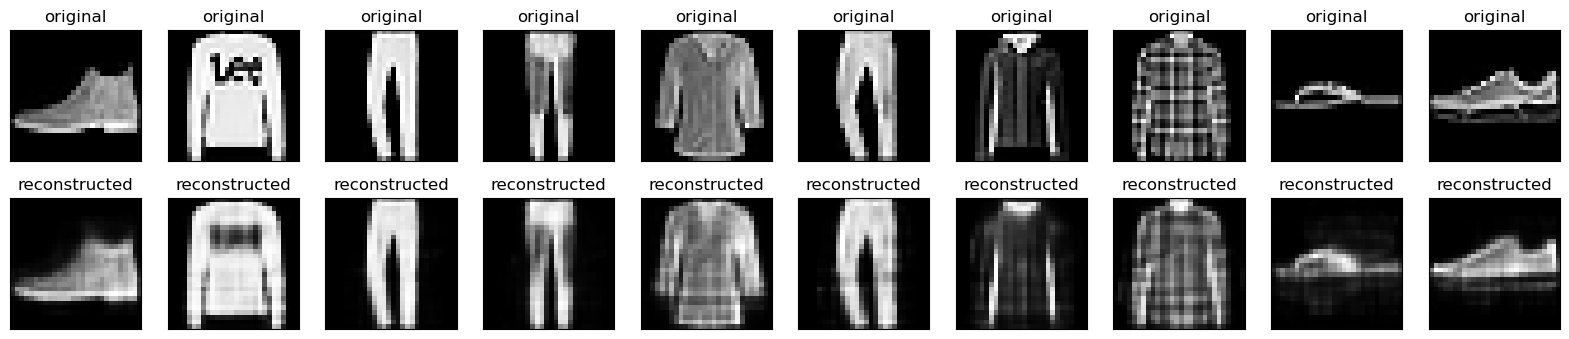

In [43]:
n = 10
plt.figure(figsize=(20, 4))
for i in range(n):
    # display original
    ax = plt.subplot(2, n, i + 1)
    plt.imshow(x_test[i])
    plt.title("original")
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # display reconstruction
    ax = plt.subplot(2, n, i + 1 + n)
    plt.imshow(decoded_imgs[i])
    plt.title("reconstructed")
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()

## Answers

### Run with 30 epochs 

In [52]:
class Autoencoder(Model):
  def __init__(self, latent_dim, shape):
    super(Autoencoder, self).__init__()
    self.latent_dim = latent_dim
    self.shape = shape
    self.encoder = tf.keras.Sequential([
      layers.Flatten(),
      layers.Dense(latent_dim, activation='relu'),
    ])
    self.decoder = tf.keras.Sequential([
      layers.Dense(tf.math.reduce_prod(shape).numpy(), activation='sigmoid'),
      layers.Reshape(shape)
    ])

  def call(self, x):
    encoded = self.encoder(x)
    decoded = self.decoder(encoded)
    return decoded


shape = x_test.shape[1:]
latent_dim = 64
autoencoder = Autoencoder(latent_dim, shape)

In [54]:
autoencoder.compile(optimizer='adam', loss=losses.MeanSquaredError())

In [56]:
autoencoder.fit(x_train, x_train,
                epochs=30,
                shuffle=True,
                validation_data=(x_test, x_test))

Epoch 1/30
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0236 - val_loss: 0.0133
Epoch 2/30
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0117 - val_loss: 0.0108
Epoch 3/30
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0101 - val_loss: 0.0102
Epoch 4/30
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0096 - val_loss: 0.0094
Epoch 5/30
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0093 - val_loss: 0.0093
Epoch 6/30
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0091 - val_loss: 0.0091
Epoch 7/30
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0090 - val_loss: 0.0091
Epoch 8/30
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0089 - val_loss: 0.0089
Epoch 9/30
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0088 - val_loss: 0.0089
Epoch 10/30
1875/1875 [==============================] - 3s 2ms/step - loss: 0.008

In [57]:
print(autoencoder.encoder.summary())
print('\n\n')
print(autoencoder.decoder.summary())
print('\n\n')
print(autoencoder.summary())

Model: "sequential_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_4 (Flatten)         (None, 784)               0         
                                                                 
 dense_8 (Dense)             (None, 64)                50240     
                                                                 
Total params: 50240 (196.25 KB)
Trainable params: 50240 (196.25 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
None



Model: "sequential_9"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_9 (Dense)             (None, 784)               50960     
                                                                 
 reshape_4 (Reshape)         (None, 28, 28)            0         
                                                    

In [58]:
encoded_imgs = autoencoder.encoder(x_test).numpy()
decoded_imgs = autoencoder.decoder(encoded_imgs).numpy()

In [59]:
decoded_imgs.shape

(10000, 28, 28)

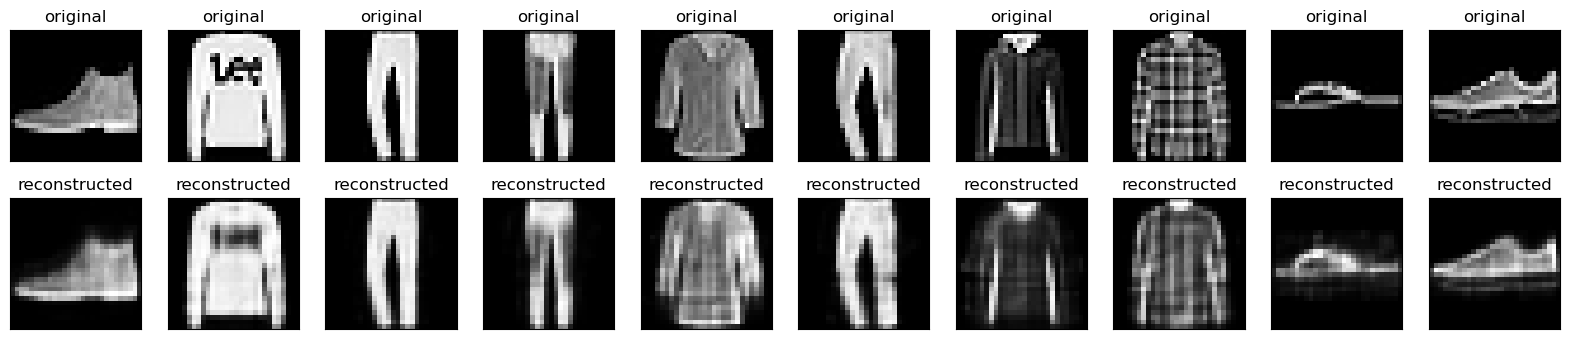

In [60]:
n = 10
plt.figure(figsize=(20, 4))
for i in range(n):
    # display original
    ax = plt.subplot(2, n, i + 1)
    plt.imshow(x_test[i])
    plt.title("original")
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # display reconstruction
    ax = plt.subplot(2, n, i + 1 + n)
    plt.imshow(decoded_imgs[i])
    plt.title("reconstructed")
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()

### Write the code implementation to calculate the loss (Mean Squared Error) for the test dataset.

In [69]:
from sklearn.metrics import mean_squared_error
decoded_imgs_test = autoencoder.predict(x_test)
x_test_flat = x_test.reshape(len(x_test), -1)
decoded_imgs_test_flat = decoded_imgs_test.reshape(len(decoded_imgs_test), -1)

#  Mean Squared Error
mse_test = mean_squared_error(x_test_flat, decoded_imgs_test_flat)
print(f"Mean Squared Error: {mse_test:.4f}")

313/313 [==============================] - 0s 925us/step
Mean Squared Error: 0.0086


Epoch 1/30
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0084 - val_loss: 0.0086
Epoch 2/30
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0084 - val_loss: 0.0087
Epoch 3/30
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0084 - val_loss: 0.0087
Epoch 4/30
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0084 - val_loss: 0.0086
Epoch 5/30
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0084 - val_loss: 0.0086
Epoch 6/30
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0084 - val_loss: 0.0086
Epoch 7/30
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0084 - val_loss: 0.0086
Epoch 8/30
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0084 - val_loss: 0.0086
Epoch 9/30
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0084 - val_loss: 0.0086
Epoch 10/30
1875/1875 [==============================] - 4s 2ms/step - loss: 0.008

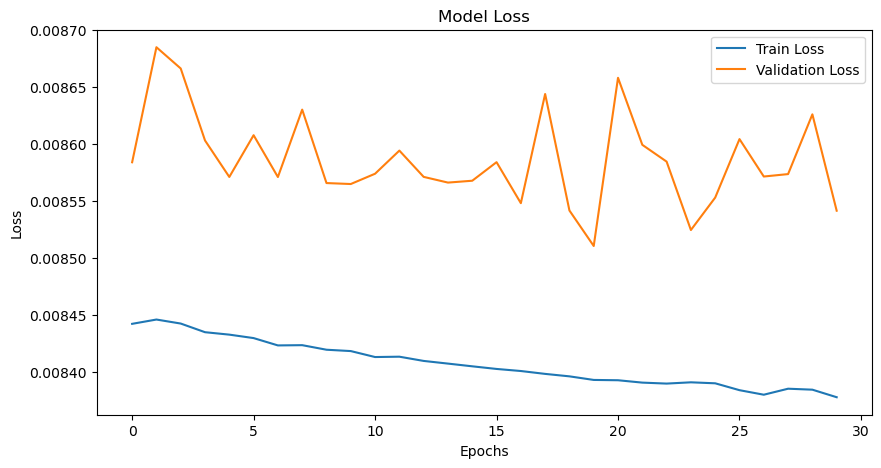

In [75]:
import matplotlib.pyplot as plt


history = autoencoder.fit(x_train, x_train,
                          epochs=30,  
                          shuffle=True,
                          validation_data=(x_test, x_test))

plt.figure(figsize=(10, 5))
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epochs')
plt.legend(loc='upper right')
plt.show()